<p style="text-align: center; font-size: 35px;">Credit Card Client Segmentation Project</p>

<div style="text-align:center">
    <img src="segmentation.png" />
</div> <br><br>


# 1. Introduction

Understanding and catering to the diverse needs of credit cardholders is pivotal for a bank's success. To gain actionable insights into the behavior of approximately 9,000 active credit cardholders over the last six months, we embark on a strategic client segmentation project. This initiative aims to categorize and comprehend the distinct patterns and preferences exhibited by credit card users, enabling the bank to tailor its services to different client segments effectively.

The dataset at our disposal encapsulates a comprehensive snapshot of each cardholder's financial activity. With columns detailing balance, purchase behavior, credit limits, payment habits, and other critical metrics, we have a wealth of information to unravel. Our primary objective is to identify and delineate diverse client segments based on their credit card usage patterns. This segmentation will empower the bank to implement targeted strategies, optimizing customer satisfaction and financial outcomes.

Let's delve into the key columns that encapsulate the financial dynamics of our credit card users:

| **Column**                       | **Description**                                                                                                      | **Type** |
|----------------------------------|----------------------------------------------------------------------------------------------------------------------|----------|
| CUST_ID                          | Describes the unique identification of the credit cardholder.                                                        | Object   |
| BALANCE                          | Indicates the amount of money left in the account for making purchases.                                              | Float    |
| BALANCE_FREQUENCY                | Reflects how often the account balance is updated. Score ranges from 0 to 1(1 = frequently, 0 = not frequently).     | Float    |
| PURCHASES                        | Represents the total amount spent on purchases from the account.                                                     | Float    |
| ONEOFF_PURCHASES                 | Denotes the maximum amount spent in a single purchase transaction.                                                   | Float    |
| INSTALLMENTS_PURCHASES           | Indicates the amount spent on purchases paid in installments.                                                        | Float    |
| CASH_ADVANCE                     | Shows the cash in advance provided by the user.                                                                      | Float    |
| PURCHASES_FREQUENCY              | Reflects how frequently purchases are made. Score ranges from 0 to 1(1 = frequently, 0 = not frequently).            | Float    |
| ONEOFF_PURCHASES_FREQUENCY       | Indicates how often one-time purchases occur. Score ranges from 0 to 1(1 = frequently, 0 = not frequently).          | Float    |
| PURCHASES_INSTALLMENTS_FREQUENCY | Reflects how often purchases in installments are made. Score ranges from 0 to 1(1 = frequently, 0 = not frequently). | Float    |
| CASH_ADVANCE_FREQUENCY           | Indicates how frequently cash in advance is paid.                                                                    | Float    |
| CASH_ADVANCE_TRX                 | Represents the number of transactions made with "Cash in Advance."                                                   | Int      |
| PURCHASES_TRX                    | Represents the number of purchase transactions made.                                                                 | Int      |
| CREDIT_LIMIT                     | Denotes the credit card limit assigned to the user.                                                                  | Float    |
| PAYMENTS                         | Represents the total amount of payments made by the user.                                                            | Float    |
| MINIMUM_PAYMENTS                 | Denotes the minimum amount of payments made by the user.                                                             | Float    |
| PRC_FULL_PAYMENT                 | Represents the percentage of the full credit card balance paid by the user.                                          | Float    |
| TENURE                           | Represents the duration of credit card service for the user in months.                                               | Int      |

# 2. Import Dataset and packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# Models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Metrics
from sklearn.metrics import silhouette_score

# Hyperparametrization
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset:

df = pd.read_csv("credit_card_data.csv")

In [3]:
df_preprocess = df.copy()

# 3. Exploratory Data Analysis

In [4]:
df_preprocess.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


We are going to convert the columns to lowercase for better processing:

In [5]:
df_preprocess.columns = [col.lower() for col in df_preprocess.columns]

## 3.1. Column information

In [6]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [7]:
df_preprocess.groupby(by="tenure")["cust_id"].count()

tenure
6      204
7      190
8      196
9      175
10     236
11     365
12    7584
Name: cust_id, dtype: int64

## 3.2. Column stats

In [8]:
df_preprocess.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## 3.3. NaN Values

In [9]:
nan_values = df_preprocess.isna().sum()
percentages_nan = round(df_preprocess.isna().sum()*100/len(df_preprocess), 2)
df_nan_values = pd.DataFrame({'count': nan_values,'percentage':percentages_nan})
df_nan_values

,count,percentage
cust_id,0,0.00
balance,0,0.00
balance_frequency,0,0.00
purchases,0,0.00
oneoff_purchases,0,0.00
installments_purchases,0,0.00
cash_advance,0,0.00
purchases_frequency,0,0.00
oneoff_purchases_frequency,0,0.00
purchases_installments_frequency,0,0.00


Let's take a look at those NaN values:

- "credit_limit" Column

In [10]:
df_preprocess[df_preprocess["credit_limit"].isna()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


- "minimum_payments" Column

In [11]:
df_preprocess[df_preprocess["minimum_payments"].isna()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


## 3.4. Column correlation

In [ ]:
sns.pairplot(df_preprocess[["balance",
                            "balance_frequency",
                            "purchases",
                            "oneoff_purchases",
                            "installments_purchases",
                            "cash_advance",
                            "purchases_frequency",
                            "oneoff_purchases_frequency", 
                            "purchases_installments_frequency", 
                            "cash_advance_frequency",
                            "cash_advance_trx",
                            "purchases_trx",
                            "credit_limit",
                            "payments",
                            "minimum_payments",
                            "prc_full_payment",
                            "tenure"
                           ]]);

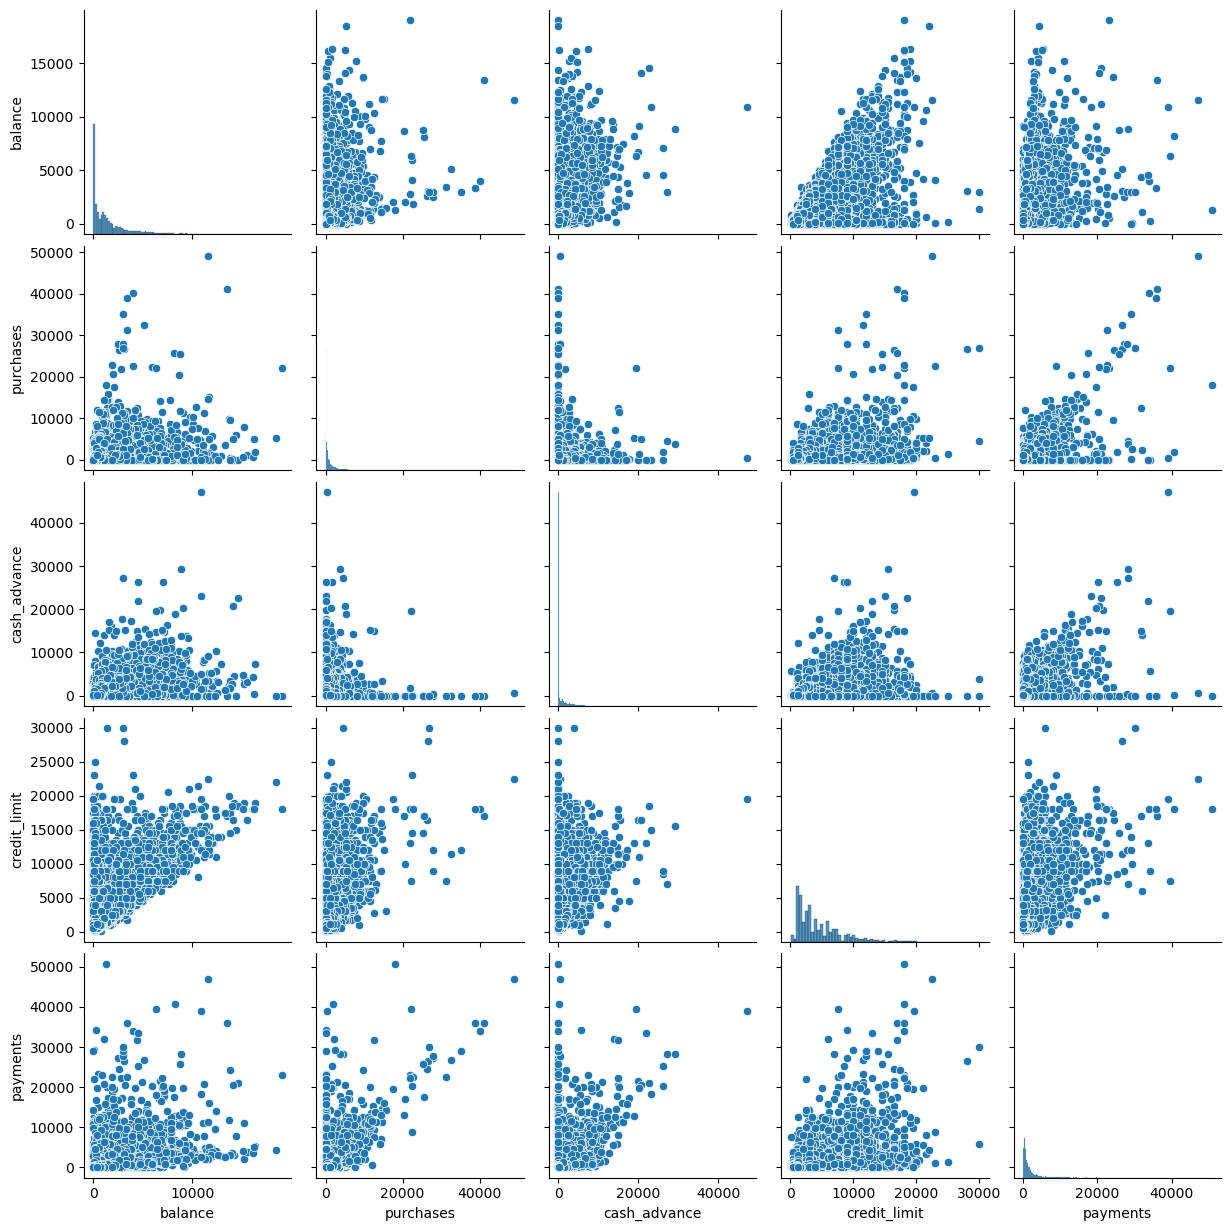

In [13]:
sns.pairplot(df_preprocess[["balance",
                            "purchases",
                            "cash_advance",
                            "credit_limit",
                            "payments"
                           ]]);

## 3.5. Column visualizations

Let's plot the distribution and a boxplot of each column:

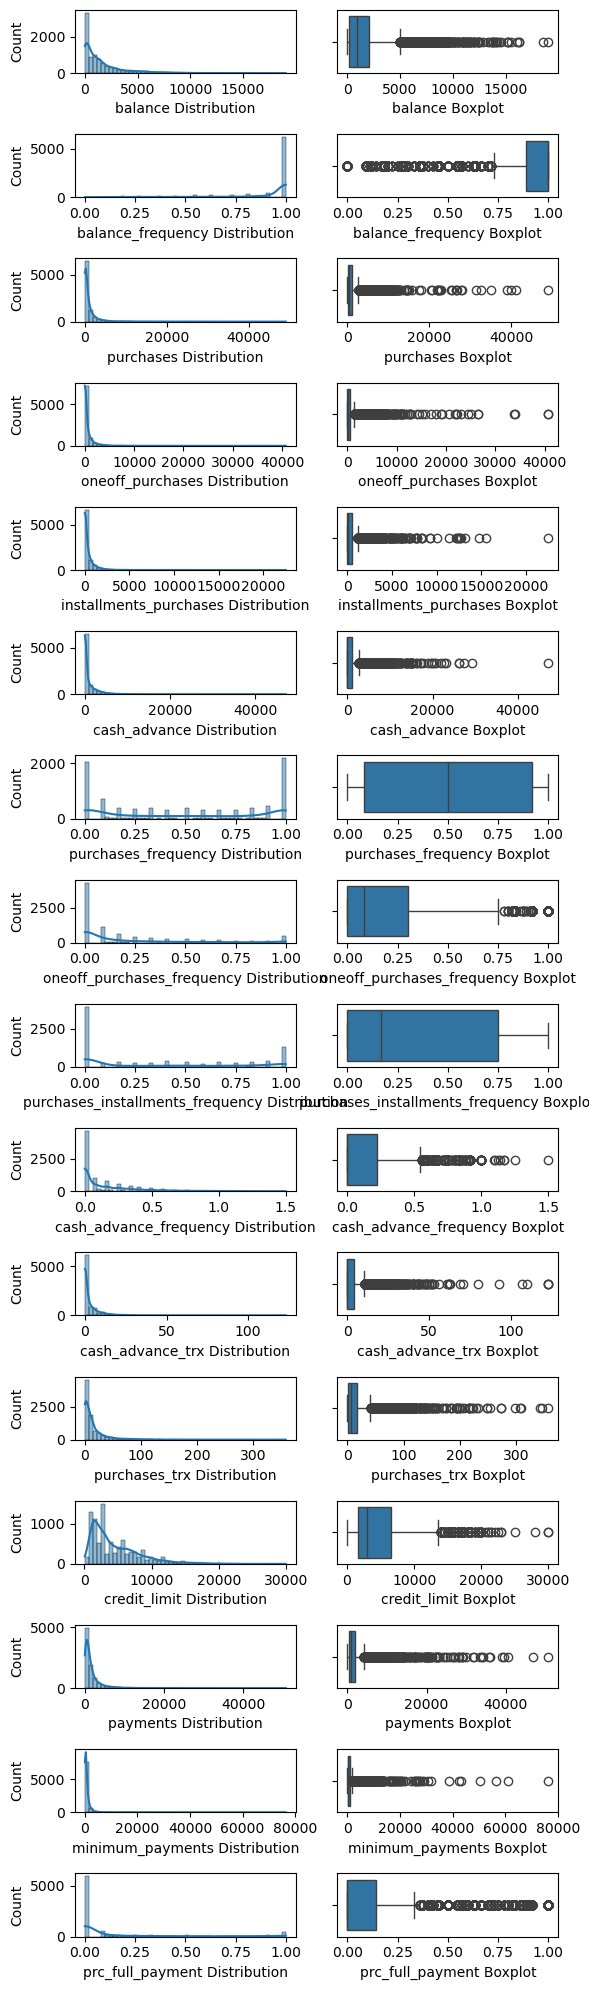

In [14]:
columns = df_preprocess.columns[1:-1]
rows = len(columns)

fig, axes =  plt.subplots(rows, 2, figsize = (6, 20))
axes = axes.flatten()
plot_num = [i for i in range(axes.size) if i%2 == 0]

for idx, col in zip(plot_num, columns):
    sns.histplot(x = df_preprocess[col], bins = 50, kde = True, ax = axes[idx])
    axes[idx].set_xlabel(f'{col} Distribution')
    sns.boxplot(x = df_preprocess[col], ax = axes[idx + 1])
    axes[idx + 1].set_xlabel(f'{col} Boxplot')
    
plt.tight_layout()    
plt.show()

We can observe inconsistent values in the 'cash_advance_frequency' column that exceed 1. Let's take a look at this column:

In [15]:
df_preprocess[df_preprocess["cash_advance_frequency"] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


#### After analyzing the information and the graphs, it's considered to perform the following transformations on the values of our columns:

##### 1. Cleaning the 'cash_advance_frequency' column, we found values above 1. These values will be set as NaN.

<br>

##### 2. Logarithmic scaling transformation of the columns for handling outliers:
- "balance"
- "purchases"
- "oneoff_purchases"
- "installments_purchases"
- "cash_advance"
- "cash_advance_trx"
- "purchases_trx"
- "credit_limit"
- "payments"
- "minimum_payments"

<br>

##### 3. Handling NaN values with KNN Imputer.

# 4. Data cleaning

## 4.1. Handling inconsistent values

In [16]:
indices_inco = df_preprocess[df_preprocess["cash_advance_frequency"] > 1].index

In [17]:
for indice in indices_inco:
    df_preprocess.loc[indice, "cash_advance_frequency"] = np.nan

In [18]:
df_preprocess[df_preprocess["cash_advance_frequency"] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


## 4.2. Outliers

For the treatment of outliers, we will logarithmically scale variables with high dispersion:

In [19]:
df_preprocess_log = df_preprocess.copy()

log_columns = ["balance", "purchases", "oneoff_purchases", "installments_purchases", "cash_advance", "cash_advance_trx", "purchases_trx", "credit_limit", "payments", "minimum_payments"]

for col in log_columns:
    df_preprocess_log[col] = df_preprocess_log[col].apply(lambda x: np.log(x+1))

Let's plot the distribution of each column:

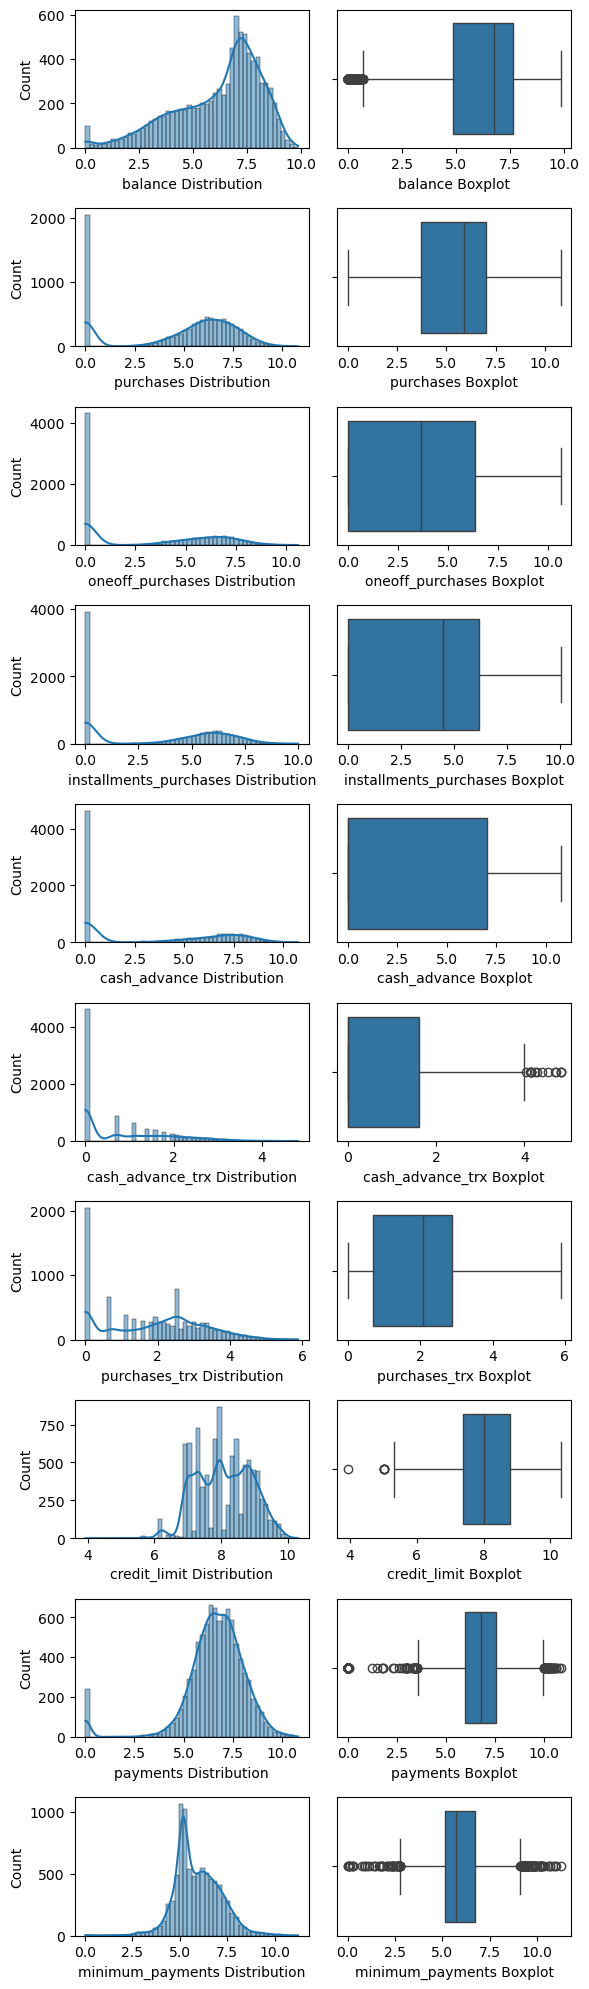

In [20]:
rows = len(log_columns)

fig, axes =  plt.subplots(rows, 2, figsize = (6, 20))
axes = axes.flatten()
plot_num = [i for i in range(axes.size) if i%2 == 0]

for idx, col in zip(plot_num, log_columns):
    sns.histplot(x = df_preprocess_log[col], bins = 50, kde = True, ax = axes[idx])
    axes[idx].set_xlabel(f'{col} Distribution')
    sns.boxplot(x = df_preprocess_log[col], ax = axes[idx + 1])
    axes[idx + 1].set_xlabel(f'{col} Boxplot')
    
plt.tight_layout()    
plt.show()

In [21]:
def outliers(variable):
    '''
    Function to obtain the upper and lower limits after calculating the interquartile range.
    '''
    Q1 = variable.quantile(q = 0.25)
    Q3 = variable.quantile(q = 0.75)

    # Rango intercuartil (IQR)
    IQR = Q3 - Q1

    # Calcular los limites inferior y superior
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    return lim_inf, lim_sup

- #### "balance" Column:

In [22]:
lim_inf_0, lim_sup_0 = outliers(df_preprocess_log["balance"])
percentage_outliers_balance = len(df_preprocess_log[(~df_preprocess_log["balance"].between(lim_inf_0, lim_sup_0))])*100/len(df_preprocess_log)

print(f"Lower limit: {lim_inf_0}\nUpper limit: {lim_sup_0}")
print(f"\nPercentage of outliers in the 'balance' column: {round(percentage_outliers_balance, 2)} %")

Lower limit: 0.7128394793291024
Upper limit: 11.77725511104541

Percentage of outliers in the 'balance' column: 1.47 %


- #### "cash_advance_trx" Column:

In [23]:
lim_inf_1, lim_sup_1 = outliers(df_preprocess_log["cash_advance_trx"])
percentage_outliers_cash_advance_trx = len(df_preprocess_log[(~df_preprocess_log["cash_advance_trx"].between(lim_inf_1, lim_sup_1))])*100/len(df_preprocess_log)

print(f"Lower limit: {lim_inf_1}\nUpper limit: {lim_sup_1}")
print(f"\nPercentage of outliers in the 'cash_advance_trx' column: {round(percentage_outliers_cash_advance_trx, 2)} %")

Lower limit: -2.4141568686511503
Upper limit: 4.023594781085251

Percentage of outliers in the 'cash_advance_trx' column: 0.17 %


- #### "credit_limit" Column:

In [24]:
lim_inf_2, lim_sup_2 = outliers(df_preprocess_log["credit_limit"])
percentage_outliers_credit_limit = len(df_preprocess_log[(~df_preprocess_log["credit_limit"].between(lim_inf_2, lim_sup_2))])*100/len(df_preprocess_log)

print(f"Lower limit: {lim_inf_2}\nUpper limit: {lim_sup_2}")
print(f"\nPercentage of outliers in the 'credit_limit' column: {round(percentage_outliers_credit_limit, 2)} %")

Lower limit: 5.276392347185082
Upper limit: 10.8817026560161

Percentage of outliers in the 'credit_limit' column: 0.08 %


- #### "payments" Column:

In [25]:
lim_inf_3, lim_sup_3 = outliers(df_preprocess_log["payments"])
percentage_outliers_payments = len(df_preprocess_log[(~df_preprocess_log["payments"].between(lim_inf_3, lim_sup_3))])*100/len(df_preprocess_log)

print(f"Lower limit: {lim_inf_3}\nUpper limit: {lim_sup_3}")
print(f"\nPercentage of outliers in the 'payments' column: {round(percentage_outliers_payments, 2)} %")

Lower limit: 3.552305914975821
Upper limit: 9.949787411950464

Percentage of outliers in the 'payments' column: 3.55 %


- #### "minimum_payments" Column:

In [26]:
lim_inf_4, lim_sup_4 = outliers(df_preprocess_log["minimum_payments"])
percentage_outliers_minimum_payments = len(df_preprocess_log[(~df_preprocess_log["minimum_payments"].between(lim_inf_4, lim_sup_4))])*100/len(df_preprocess_log)

print(f"Lower limit: {lim_inf_4}\nUpper limit: {lim_sup_4}")
print(f"\nPercentage of outliers in the 'minimum_payments' column: {round(percentage_outliers_minimum_payments, 2)} %")

Lower limit: 2.765541166162284
Upper limit: 9.08816701812645

Percentage of outliers in the 'minimum_payments' column: 5.11 %


#### 4.2.1. Removal of outliers in columns with a lower percentage of outliers.

In [27]:
# "balance" Column 
df_preprocess_log = df_preprocess_log[df_preprocess_log["balance"].between(lim_inf_0, lim_sup_0)]

# "cash_advance_trx" Column 
df_preprocess_log = df_preprocess_log[df_preprocess_log["cash_advance_trx"].between(lim_inf_1, lim_sup_1)]

# "credit_limit" Column
df_preprocess_log = df_preprocess_log[df_preprocess_log["credit_limit"].between(lim_inf_2, lim_sup_2)]

#### 4.2.2. Handling outliers for columns with a higher percentage of outliers.

We will set all values above and below the limits to NaN, and we will impute them using KNNImputer.

In [28]:
# "payments" Column
indices_outliers_payments = df_preprocess_log[~(df_preprocess_log["payments"].between(lim_inf_3, lim_sup_3))].index

for indice in indices_outliers_payments:
    df_preprocess_log.loc[indice, "payments"] = np.nan

# "minimum_payments" Column
indices_outliers_minimum_payments = df_preprocess_log[~(df_preprocess_log["minimum_payments"].between(lim_inf_4, lim_sup_4))].index

for indice in indices_outliers_minimum_payments:
    df_preprocess_log.loc[indice, "minimum_payments"] = np.nan

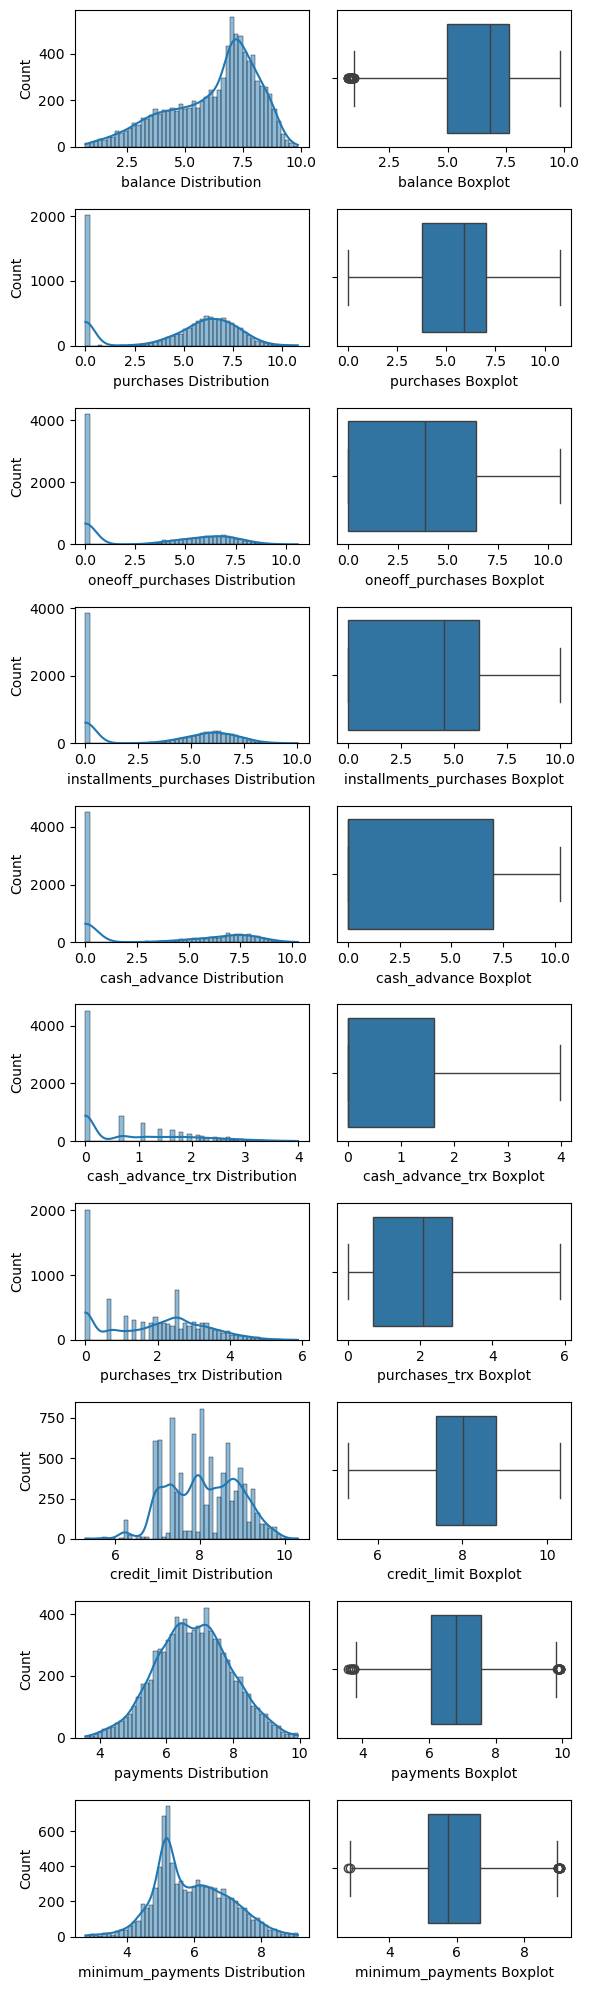

In [29]:
fig, axes =  plt.subplots(rows, 2, figsize = (6, 20))
axes = axes.flatten()
plot_num = [i for i in range(axes.size) if i%2 == 0]

for idx, col in zip(plot_num, log_columns):
    sns.histplot(x = df_preprocess_log[col], bins = 50, kde = True, ax = axes[idx])
    axes[idx].set_xlabel(f'{col} Distribution')
    sns.boxplot(x = df_preprocess_log[col], ax = axes[idx + 1])
    axes[idx + 1].set_xlabel(f'{col} Boxplot')
    
plt.tight_layout()    
plt.show()

# 5. Remove duplicates

In [30]:
df_preprocess_log.duplicated().sum()

0

# 6. Feature Engineering

In [31]:
df_process_total = df_preprocess_log.copy()

## 6.1. Data selection

For our analysis, we will not consider the columns 'cust_id' and 'tenure'.

In [32]:
df_preprocess_log = df_preprocess_log.drop(["cust_id", "tenure"], axis = 1)

In [33]:
df_preprocess_log.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.0,0.083333,0.00,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.0,0.000000,0.25,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.0,0.000000,0.00,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000


## 6.2. Missing values

For handling NaN values, we will use the KNN Imputer:

In [34]:
nan_imputer = KNNImputer()
df_preprocess_log = pd.DataFrame(data = nan_imputer.fit_transform(df_preprocess_log), columns = df_preprocess_log.columns)
df_preprocess_log.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
dtype: int64

# 6.3. Data enconding

We will use two dataframes for modeling, one with logarithmic scaling and another without scaling. We will compare the results from both and choose the one that provides more coherent conclusions.

We'll scale the data using StandardScaler:

In [35]:
# Datos en escala logarítmica:
df_processed_log = df_preprocess_log.copy()

scaler_log = StandardScaler()
df_processed_log_scaled = scaler_log.fit_transform(df_processed_log)

In [36]:
# Datos sin escala:
df_processed = df_processed_log.copy()

for col in log_columns:
    df_processed[col] = df_processed[col].apply(lambda x: np.exp(x) - 1)
    
scaler = StandardScaler()
df_processed_scaled = scaler.fit_transform(df_processed)

# 7. Model

We will test the DBSCAN and K-Means Clustering models to determine the different types of customers.

Because the data distribution is not symmetric, we will evaluate the models with the logarithmic transformation, then check without scaling, and choose the most coherent results.

In [37]:
def kmeans_inertia(k, X):
        '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        k: (list of ints) - The different k values to try
        X: (array) - The training data         

    Returns: 
        inertia: (list) - A list of inertia scores, one for each value of k
    '''
        
        inertia = []
        
        for i in k:
            kms = KMeans(n_clusters = i, random_state = 42)
            kms.fit(X)            
            inertia.append(kms.inertia_)
        
        return inertia
    
def kmeans_sil(k, X):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        k: (list of ints) - The different k values to try
        X: (array) - The training data

    Returns: 
        sil_scores: (list) - A list of silhouette scores, one for each value of k
    '''
    
    sil_scores = []
    
    for i in k:
        kms = KMeans(n_clusters = i, random_state = 42)
        kms.fit(X)
        sil_scores.append(silhouette_score(X, kms.labels_))
        
    return sil_scores

## 7.1. DBSCAN

DBSCAN is a density-based algorithm. These algorithms identify regions of high density that separate the data and create asymmetric clusters. They can find clusters of arbitrary shapes without being affected by noise.

### 7.1.1. Hyperparametrization

We will model with the data in logarithmic scaling and without scaling, choosing the one that yields a more coherent result.<br>

Let's start by using the elbow method on each case to obtain the optimal value for epsilon (eps).

- Without Log Scaled:

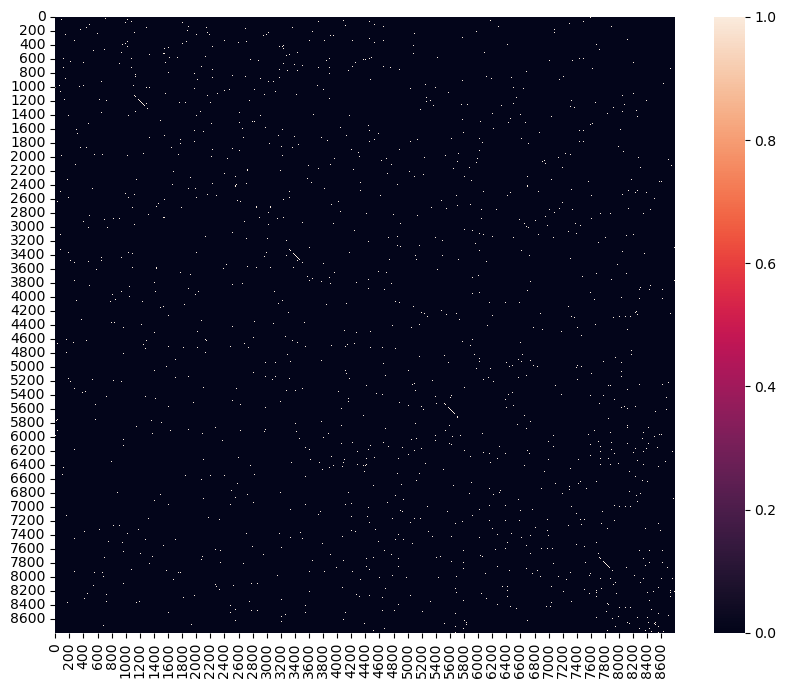

In [38]:
# Elbow method for DBSCAN

neigh = NearestNeighbors(n_neighbors = 2*df_processed_scaled.shape[1] - 1)
neigh.fit(df_processed_scaled)
distances, indices = neigh.kneighbors(df_processed_scaled)

# Distance plot with k-nearest neighbors
plt.figure(figsize = (10, 8))
sns.heatmap(neigh.kneighbors_graph(df_processed_scaled).toarray())

plt.show()

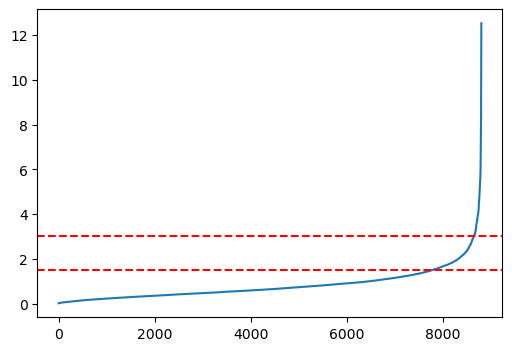

In [39]:
# Plot to find the 'optimal' value of eps
plt.figure(figsize = (6, 4))
plt.plot(np.sort(distances, axis = 0)[:, 1])
plt.axhline(y= 1.5, color='red', linestyle='--')
plt.axhline(y= 3, color='red', linestyle='--')
plt.show()

In [40]:
dbscan_params = []
num_columns = 2*df_processed_scaled.shape[1]

In [41]:
%%time
for eps in [i/10 for i in range(15,30)]:
    for min_samples in [5, 10, num_columns]:
        for metric in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
            
            # DBSCAN
            model_DBSCAN = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            model_DBSCAN.fit(df_processed_scaled)
            
            # Clusters
            n_clusters = (len(set(model_DBSCAN.labels_)) - 1) # DBSCAN label ouliers as Cluster_-1 
            
            # Score
            try:
                sil_score = silhouette_score(X = df_processed_scaled, labels = model_DBSCAN.labels_)
            except:
                silscore = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters])

CPU times: total: 17min 10s
Wall time: 6min 20s


In [42]:
df_dbscan_params = pd.DataFrame(dbscan_params, columns= ["eps", "min_samples", "metric", "sil_score", "n_clusters"])
df_dbscan_params.sort_values(by="sil_score", ascending=False).head(3)

,eps,min_samples,metric,sil_score,n_clusters
254,2.9,5,euclidean,0.598814,1
256,2.9,5,l2,0.598814,1
260,2.9,10,euclidean,0.586331,1


In [43]:
df_dbscan_params[df_dbscan_params["n_clusters"] == 3].sort_values(by="sil_score", ascending=False).head(3)

,eps,min_samples,metric,sil_score,n_clusters
2,1.5,5,euclidean,0.076852,3
4,1.5,5,l2,0.076852,3
60,1.8,10,cityblock,0.015075,3


In [44]:
model_DBSCAN = DBSCAN(eps = 1.5, min_samples = 5, metric = "euclidean")
model_DBSCAN.fit(df_processed_scaled)

DBSCAN(eps=1.5)

In [45]:
Counter(model_DBSCAN.labels_)

Counter({0: 7510, -1: 1275, 1: 6, 2: 5})

- With Log Scaled:

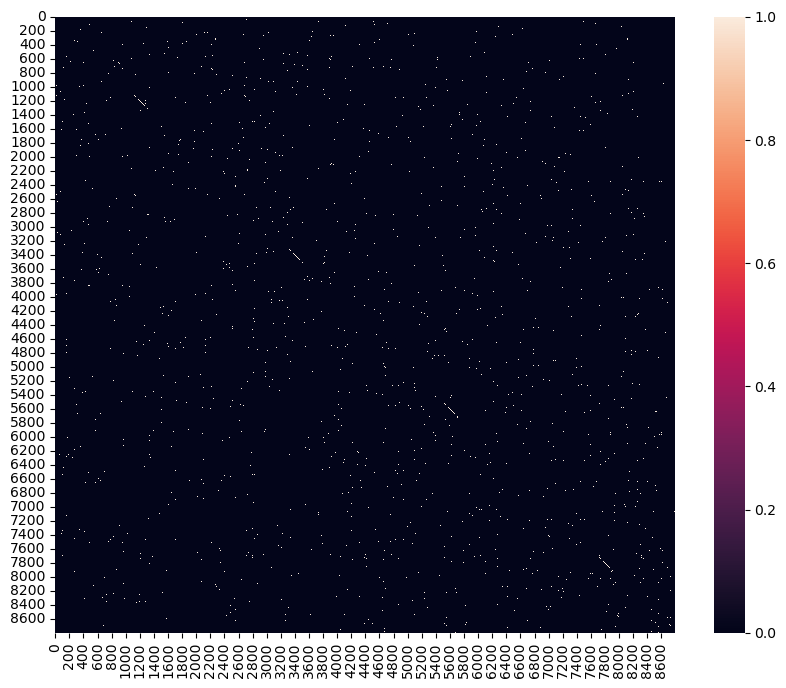

In [56]:
# Elbow method for DBSCAN

neigh_log = NearestNeighbors(n_neighbors = 2*df_processed_log_scaled.shape[1] - 1)
neigh_log.fit(df_processed_log_scaled)
distances_log, indices_log = neigh_log.kneighbors(df_processed_log_scaled)

# Distance plot with k-nearest neighbors
plt.figure(figsize = (10, 8))
sns.heatmap(neigh_log.kneighbors_graph(df_processed_log_scaled).toarray())

plt.show()

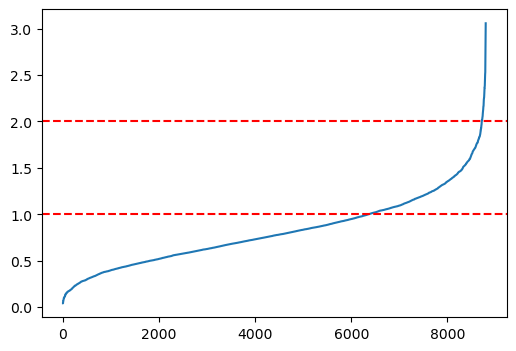

In [57]:
# Plot to find the 'optimal' value of eps
plt.figure(figsize = (6, 4))
plt.plot(np.sort(distances_log, axis = 0)[:, 1])
plt.axhline(y= 1, color='red', linestyle='--')
plt.axhline(y= 2, color='red', linestyle='--')
plt.show()

In [46]:
dbscan_params_log = []
num_columns = 2*df_processed_log_scaled.shape[1]

In [48]:
%%time
for eps in [i/10 for i in range(10,20)]:
    for min_samples in [5, 10, num_columns]:
        for metric in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
            
            # DBSCAN
            model_DBSCAN_log = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            model_DBSCAN_log.fit(df_processed_log_scaled)
            
            # Clusters
            n_clusters = (len(set(model_DBSCAN_log.labels_)) - 1) # DBSCAN label ouliers as Cluster_-1 
            
            # Score
            try:
                sil_score = silhouette_score(X = df_processed_log_scaled, labels = model_DBSCAN_log.labels_)
            except:
                silscore = np.nan
            
            dbscan_params_log.append([eps, min_samples, metric, sil_score, n_clusters])

CPU times: total: 10min 34s
Wall time: 3min 51s


In [49]:
df_dbscan_params_log = pd.DataFrame(dbscan_params_log, columns= ["eps", "min_samples", "metric", "sil_score", "n_clusters"])
df_dbscan_params_log.sort_values(by="sil_score", ascending=False).head(3)

,eps,min_samples,metric,sil_score,n_clusters
176,1.9,32,euclidean,0.120662,1
178,1.9,32,l2,0.120662,1
170,1.9,10,euclidean,0.120364,1


In [53]:
df_dbscan_params_log[df_dbscan_params_log["n_clusters"] == 3].sort_values(by="sil_score", ascending=False).head(3)

,eps,min_samples,metric,sil_score,n_clusters
146,1.8,5,euclidean,0.026153,3
148,1.8,5,l2,0.026153,3
14,1.0,32,euclidean,-0.062267,3


In [54]:
dbscan_log = DBSCAN(eps = 1.8, min_samples = 5, metric = "euclidean")
dbscan_log.fit(df_processed_log_scaled)

DBSCAN(eps=1.8)

In [55]:
Counter(dbscan_log.labels_)

Counter({0: 8536, -1: 244, 2: 13, 1: 3})

### 7.1.2. Results

After analyzing the results obtained in both cases, we observe that in neither of them a coherent number of clusters is achieved. If we examine the Silhouette score, we see that the highest value corresponds to 1 cluster in both cases, providing no meaningful information for our study. We assume that the algorithm is unable to identify a well-defined number of clusters because the arrangement of the data is not separated and is dense. In this case, the KMeans Clustering algorithm could be more appropriate.

## 7.2. K-Means Clustering

K-Means is an unsupervised learning algorithm that aims to group observations in a dataset into different clusters. Since our goal is to identify the different groups to which customers belong, we will try to find the number of clusters that best fits our data.

### 7.2.1. Hyperparametrization

We will model with the data in logarithmic scaling and without scaling, choosing the one that yields a more coherent result.

- With Log Scaled:

We use the elbow method to find the optimal number of clusters. Plotting the inertia values in a simple line graph with the k values along the x-axis, we could see an "elbow", which is usually the part of the curve with the sharpest angle.

The inertia of the model is the distance of each point from the center of the clusters, the higher the inertia, the greater the distance between the cluster centers and the points.<br>

Because we don't know how many clusters exist in the data, lets start by fitting K-means and examining the inertia values for different values of k.

In [56]:
num_clusters = [i for i in range(2, 11)]

Inertia_log = kmeans_inertia(num_clusters, df_processed_log_scaled)

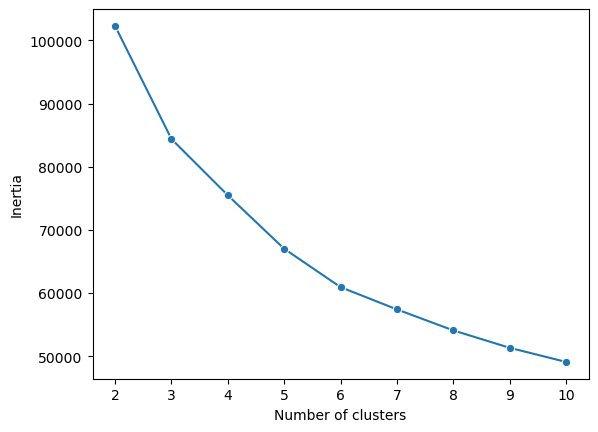

In [57]:
plot = sns.lineplot(x=num_clusters, y=Inertia_log, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

It's not clear where the elbow is but it seems to be in two or three clusters. Let's check the Silhouette score.<br>

Silhouette score provide insights as to what the optimal value for k should be, and uses both intracluster and intercluster measurements in its calculations.

In [58]:
sil_scores_log = kmeans_sil(num_clusters,df_processed_log_scaled)

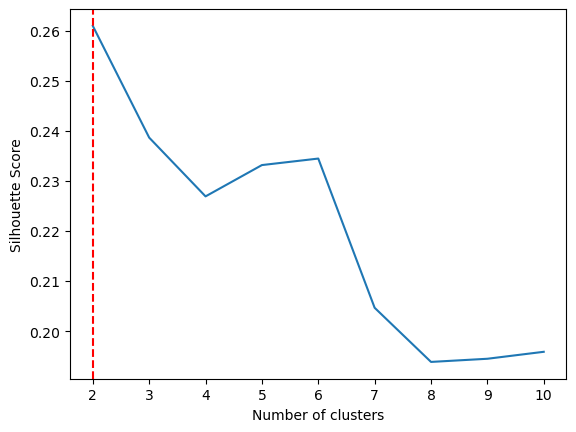

In [59]:
plot = sns.lineplot(x=num_clusters, y=sil_scores_log)
plot.axvline(x=2, color='red', linestyle='--')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when our data is partitioned into two clusters.<br>

It seems that the number of clusters could be two.

- Without Log Scaled:

In [60]:
num_clusters = [i for i in range(2, 11)]

Inertia = kmeans_inertia(num_clusters, df_processed_scaled)

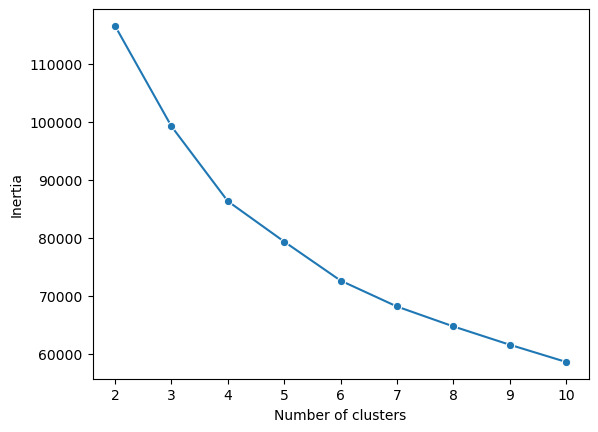

In [61]:
plot = sns.lineplot(x=num_clusters, y=Inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

It's not clear where the elbow is but it seems to be between three and five clusters. Let's check the Silhouette score.<br>

In [62]:
sil_scores = kmeans_sil(num_clusters,df_processed_scaled)

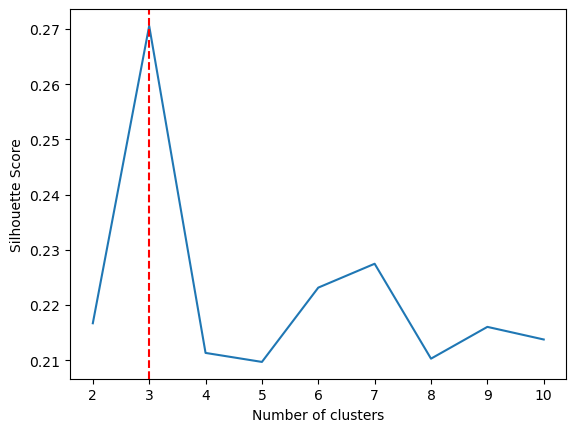

In [63]:
plot = sns.lineplot(x=num_clusters, y=sil_scores)
plot.axvline(x=3, color='red', linestyle='--')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when our data is partitioned into three clusters.<br>

At this point, it seems that the number of clusters could be three.

### 7.2.2. Results

***Of the two results, we find the one obtained with unscaled data more accurate. It has lower inertia and a higher Silhouette.***<br>

Let's instantiate a new K-means model with 3 clusters and fit it to our data and analyze each of the obtained customer groups.

In [64]:
KMeans_3 = KMeans(n_clusters=3, random_state=42)
KMeans_3.fit(df_processed_scaled)

KMeans(n_clusters=3, random_state=42)

#### - Centers information

In [65]:
df_centroides  = pd.DataFrame(data = KMeans_3.cluster_centers_, columns = df_processed.columns)
df_centroides

#### - Reversing the scaling process

In [153]:
df_centroides =  pd.DataFrame(data = scaler.inverse_transform(df_centroides), columns = df_centroides.columns)
df_centroides.index.name = "cluster"
df_centroides

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment
cluster,,,,,,,,,,,,,,,,
0,4.576272e+06,1.102068,9.154983e+06,4.504500e+06,1.422615e+06,8.300044e+05,0.872303,0.403690,0.660725,0.146557,11.058267,1421.527120,2.788572e+07,8.635591e+06,8.753203e+05,0.243602
1,8.425975e+06,1.097629,9.100063e+05,4.521101e+05,1.393291e+05,7.656001e+06,0.590954,0.239715,0.427003,0.221090,73.268153,167.936610,2.449873e+07,6.523824e+06,1.417575e+06,0.165198
2,1.695945e+06,1.073698,1.084679e+06,4.296708e+05,2.257200e+05,6.953556e+05,0.676670,0.245775,0.498739,0.148887,10.538641,230.075644,1.196150e+07,2.110790e+06,4.155479e+05,0.201945


In [70]:
df_processed_grouped = df_processed.copy()
df_processed_grouped["cluster"] = KMeans_3.labels_

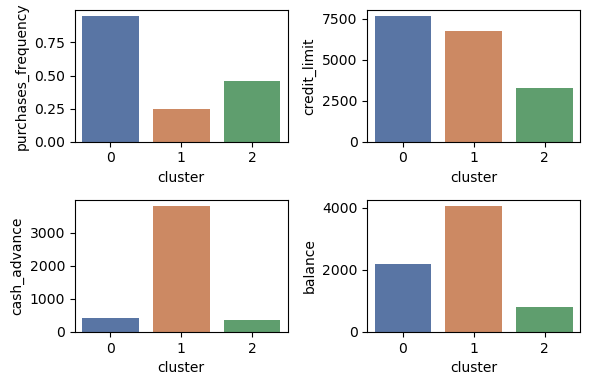

In [154]:
key_columns = ["purchases_frequency", "credit_limit", "cash_advance", "balance"]

fig, axes =  plt.subplots(2, 2, figsize = (6, 4))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    sns.barplot(df_processed_grouped.groupby(by= "cluster")[col].mean(), palette= "deep", ax= axes[idx])
    
plt.tight_layout()    
plt.show()

#### From the <ins>results obtained</ins>, we can observe notable <ins>differences between the groups</ins>:

- <ins>**Cluster 0**</ins> is composed of customers who make a significant number of <ins>**purchases frequently**</ins> and, at the same time, have the <ins>**highest credit limit**</ins>.<br>

- <ins>**Cluster 1**</ins> is mainly formed by customers who <ins>**use cash advances**</ins> on their credit card, probably to address immediate payments, as they present the <ins>**lowest purchase frequency**</ins>. Therefore, we assume their primary use is for these purposes.<br>

- <ins>**Cluster 2**</ins> is characterized by having the <ins>**lowest credit limit**</ins>, a <ins>**low account balance**</ins>, and <ins>**occasional purchases**</ins>.

#### Let's <ins>represent</ins> the arrangement of the <ins>clusters and their centroids</ins> by reducing the dimensionality of our data <ins>using Principal Component Analysis (PCA)</ins>:

In [109]:
cluster_client = df_processed_grouped[["cluster", "cust_id"]]
pca_df = df_processed_grouped.drop(["cluster", "cust_id"], axis = 1)

In [110]:
pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(pca_df))

In [111]:
KMeans_3pca = KMeans(n_clusters=3, random_state=42)
KMeans_3pca.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

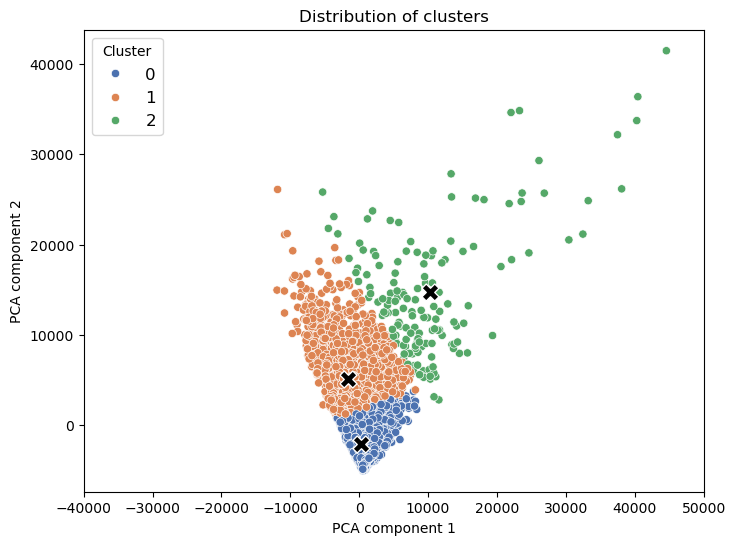

In [149]:
pca_df['cluster'] = KMeans_3pca.labels_

centroids = KMeans_3pca.cluster_centers_

centroids_comp_1 = centroids[:,0]
centroids_comp_2 = centroids[:,1]

plt.figure(figsize=(8,6))
# Component points
data_points = sns.scatterplot(data= pca_df, x= 1, y= 0, hue= 'cluster', palette= "deep")
plt.xlim((-40000, 50000))
data_points.set(xlabel='PCA component 1', ylabel='PCA component 2')

# Cluster center
clusters = sns.scatterplot(x= centroids_comp_2, y= centroids_comp_1, marker= 'X', c= ['black'], s=150)

plt.title("Distribution of clusters")
plt.legend(title='Cluster', fontsize= "large")
plt.show()